<a href="https://colab.research.google.com/github/elaaatif/DATA-ANALYSIS/blob/main/Projet_Analyse_de_donn%C3%A9es_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Analyse de données :

**1-Analyse univariée**

**2-Analyse bivariée**

**3-analyse multivariée**





Dans le cadre de ce projet d'analyse de données, nous nous appuyons sur le **FHFA House Price Index (FHFA HPI®)**, une collection exhaustive d'indices de prix des logements. Cette source de données publique et complète nous permet d'étudier les variations de la valeur des maisons individuelles à travers les 50 États et plus de 400 villes américaines, depuis le milieu des années 1970. L'analyse des tendances et des fluctuations des prix immobiliers s'appuiera sur cette dataset pour fournir une compréhension approfondie des dynamiques du marché immobilier.

**Dataset:**(lien :https://catalog.data.gov/dataset/fhfa-house-price-indexes-hpis-948c6?fbclid=IwAR1YnU2zj8HUWLuKrn4CCiyxsFIqOysTHJAOI_611-PQn80GT_n-v3efaH4).


In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [89]:
#from google.colab import drive
#drive.mount('/content/drive')


In [90]:
# Chemin du fichier CSV dans Google Drive
file_path = '/content/HPI_master.csv'

# Lecture du fichier CSV dans un DataFrame
df = pd.read_csv(file_path)


In [91]:
df.head()


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.91,100.97
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.31,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.70,100.99
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37


In [92]:
df.shape

(123970, 10)

il y a 123 970 ligne avec 10 caractéristiques ou variables.

# 1-Analyse univariée :

## L'étude de la variable 'hpi_type' :
( qualitatif nominal)

In [93]:
print(df['hpi_type'].describe())

modalites_unique = df['hpi_type'].unique()
print(modalites_unique)


count          123970
unique              4
top       traditional
freq           116768
Name: hpi_type, dtype: object
['traditional' 'non-metro' 'distress-free' 'developmental']


révèle 123 970 valeurs non nulles, avec 4 modalités distinctes(« traditionnel » « non métropolitain » « sans détresse » « développemental »). La modalité la plus fréquente« traditionnel » apparaît 116 768 fois dans cet ensemble de données.

(Mo=mode=La modalité la plus fréquente)

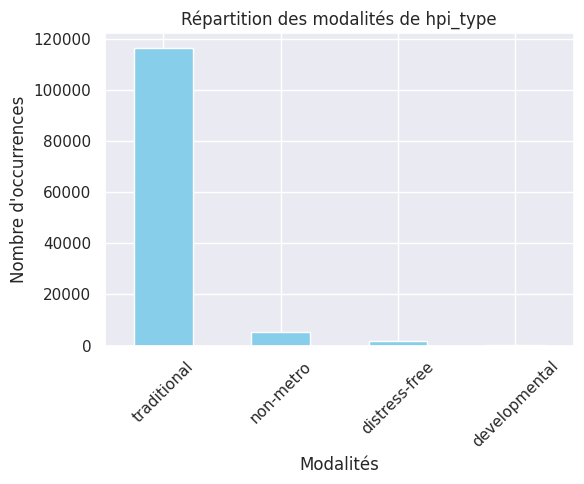

traditional      116768
non-metro          5405
distress-free      1572
developmental       225
Name: hpi_type, dtype: int64


In [94]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_type'].value_counts()

# Créer un graphique à barres pour visualiser la répartition des modalités
plt.figure(figsize=(6, 5))
modalites_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de hpi_type')
plt.xlabel('Modalités')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()
print (modalites_count)


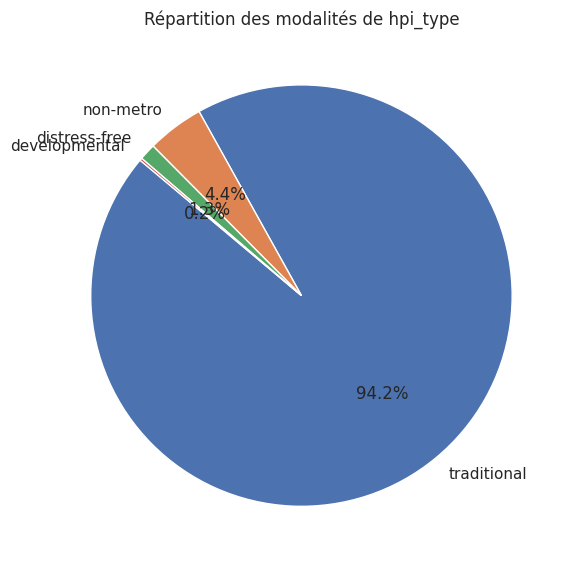

traditional      94.190530
non-metro         4.359926
distress-free     1.268049
developmental     0.181496
Name: hpi_type, dtype: float64


In [95]:
# Calculer les pourcentages des modalités
modalites_count = df['hpi_type'].value_counts(normalize=True) * 100
# Créer un graphique en camembert pour visualiser les pourcentages des modalités
plt.figure(figsize=(6, 6))
plt.pie(modalites_count, labels=modalites_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des modalités de hpi_type')

plt.tight_layout()
plt.show()
print (modalites_count)


**Construction d’un tableau statistique :**

In [96]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_type'].value_counts()
total_count = modalites_count.sum()

# Calculer les fréquences et les fréquences cumulées
modalites_freq = modalites_count / total_count
modalites_freq_cumsum = modalites_freq.cumsum()

# Créer un DataFrame pour afficher les statistiques
statistiques_df = pd.DataFrame({
    'Effictif': modalites_count,
    'Fréquence': modalites_freq,
    'Effictif cumulé': modalites_count.cumsum(),
    'Fréquence cumulée': modalites_freq_cumsum
})

# Afficher le tableau des statistiques
statistiques_df.head()


,Effictif,Fréquence,Effictif cumulé,Fréquence cumulée
traditional,116768,0.941905,116768,0.941905
non-metro,5405,0.043599,122173,0.985505
distress-free,1572,0.012680,123745,0.998185
developmental,225,0.001815,123970,1.000000


## L'étude de la variable 'hpi_flavor' :
( qualitatif nominal)

In [97]:
print(df['hpi_flavor'].describe())


count               123970
unique                   3
top       all-transactions
freq                 82725
Name: hpi_flavor, dtype: object


In [98]:
print(df['hpi_flavor'].unique())

['purchase-only' 'all-transactions' 'expanded-data']


révèle 123 970 valeurs non nulles, avec 3 modalités distinctes(«purchase» « all-transaction » « expanded-data »). La modalité la plus fréquente« all-transaction » apparaît 82725 fois dans ensemble de données.

**représenter graphique**

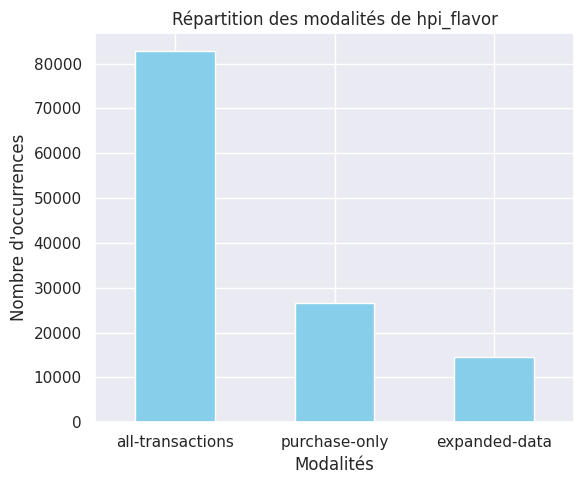

all-transactions    82725
purchase-only       26704
expanded-data       14541
Name: hpi_flavor, dtype: int64


In [99]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_flavor'].value_counts()
# Créer un graphique à barres pour visualiser la répartition des modalités
plt.figure(figsize=(6, 5))
modalites_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de hpi_flavor')
plt.xlabel('Modalités')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()
print (modalites_count)

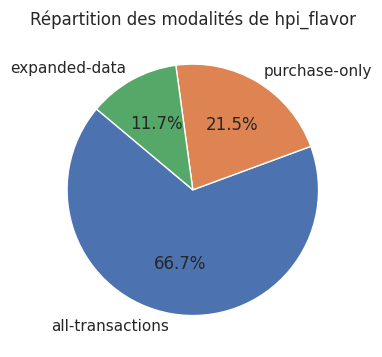

all-transactions    66.729854
purchase-only       21.540695
expanded-data       11.729451
Name: hpi_flavor, dtype: float64


In [100]:
# Calculer les pourcentages des modalités
modalites_count = df['hpi_flavor'].value_counts(normalize=True) * 100
# Créer un graphique en camembert pour visualiser les pourcentages des modalités
plt.figure(figsize=(4, 4))
plt.pie(modalites_count, labels=modalites_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des modalités de hpi_flavor')

plt.tight_layout()
plt.show()
print (modalites_count)

**Construction d’un tableau statistique :**

In [101]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_flavor'].value_counts()
total_count = modalites_count.sum()

# Calculer les fréquences et les fréquences cumulées
modalites_freq = modalites_count / total_count
modalites_freq_cumsum = modalites_freq.cumsum()

# Créer un DataFrame pour afficher les statistiques
statistiques_df = pd.DataFrame({
    'Effictif': modalites_count,
    'Fréquence': modalites_freq,
    'Effictif cumulé': modalites_count.cumsum(),
    'Fréquence cumulée': modalites_freq_cumsum
})

# Afficher le tableau des statistiques
statistiques_df.head()

,Effictif,Fréquence,Effictif cumulé,Fréquence cumulée
all-transactions,82725,0.667299,82725,0.667299
purchase-only,26704,0.215407,109429,0.882705
expanded-data,14541,0.117295,123970,1.000000


## L'étude de la variable 'level'





In [102]:
print(df['level'].describe())
print(df['level'].unique())

count     123970
unique         4
top          MSA
freq       86533
Name: level, dtype: object
['USA or Census Division' 'MSA' 'State' 'Puerto Rico']


4 modalités («USA or Ceensus Division» « MSA » « state» « Puerto Rico»). La modalité la plus fréquente« MSA » apparaît 86533 fois dans ensemble de données.

**représenter graphique**

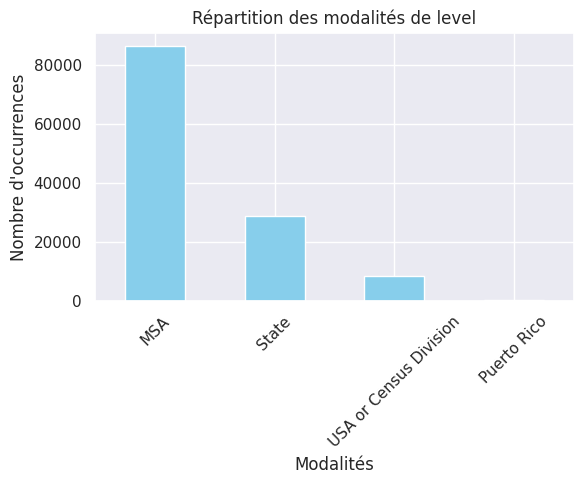

MSA                       86533
State                     28712
USA or Census Division     8500
Puerto Rico                 225
Name: level, dtype: int64


In [103]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['level'].value_counts()
# Créer un graphique à barres pour visualiser la répartition des modalités
plt.figure(figsize=(6, 5))
modalites_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de level')
plt.xlabel('Modalités')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()
print (modalites_count)

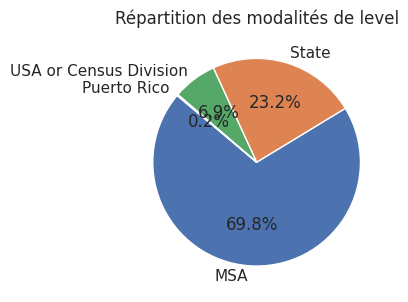

MSA                       69.801565
State                     23.160442
USA or Census Division     6.856498
Puerto Rico                0.181496
Name: level, dtype: float64


In [104]:
# Calculer les pourcentages des modalités
modalites_count = df['level'].value_counts(normalize=True) * 100
# Créer un graphique en camembert pour visualiser les pourcentages des modalités
plt.figure(figsize=(4, 4))
plt.pie(modalites_count, labels=modalites_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des modalités de level')

plt.tight_layout()
plt.show()
print (modalites_count)

In [105]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['level'].value_counts()
total_count = modalites_count.sum()

# Calculer les fréquences et les fréquences cumulées
modalites_freq = modalites_count / total_count
modalites_freq_cumsum = modalites_freq.cumsum()

# Créer un DataFrame pour afficher les statistiques
statistiques_df = pd.DataFrame({
    'Effictif': modalites_count,
    'Fréquence': modalites_freq,
    'Effictif cumulé': modalites_count.cumsum(),
    'Fréquence cumulée': modalites_freq_cumsum
})

# Afficher le tableau des statistiques
statistiques_df.head()

,Effictif,Fréquence,Effictif cumulé,Fréquence cumulée
MSA,86533,0.698016,86533,0.698016
State,28712,0.231604,115245,0.929620
USA or Census Division,8500,0.068565,123745,0.998185
Puerto Rico,225,0.001815,123970,1.000000


## L'étude de la variable 'palce name' :

In [106]:
print(df['place_name'].describe())


count                          123970
unique                            466
top       East North Central Division
freq                              850
Name: place_name, dtype: object


MO=Mode=Est North Central Division
, Ef=850

**représenter graphique**

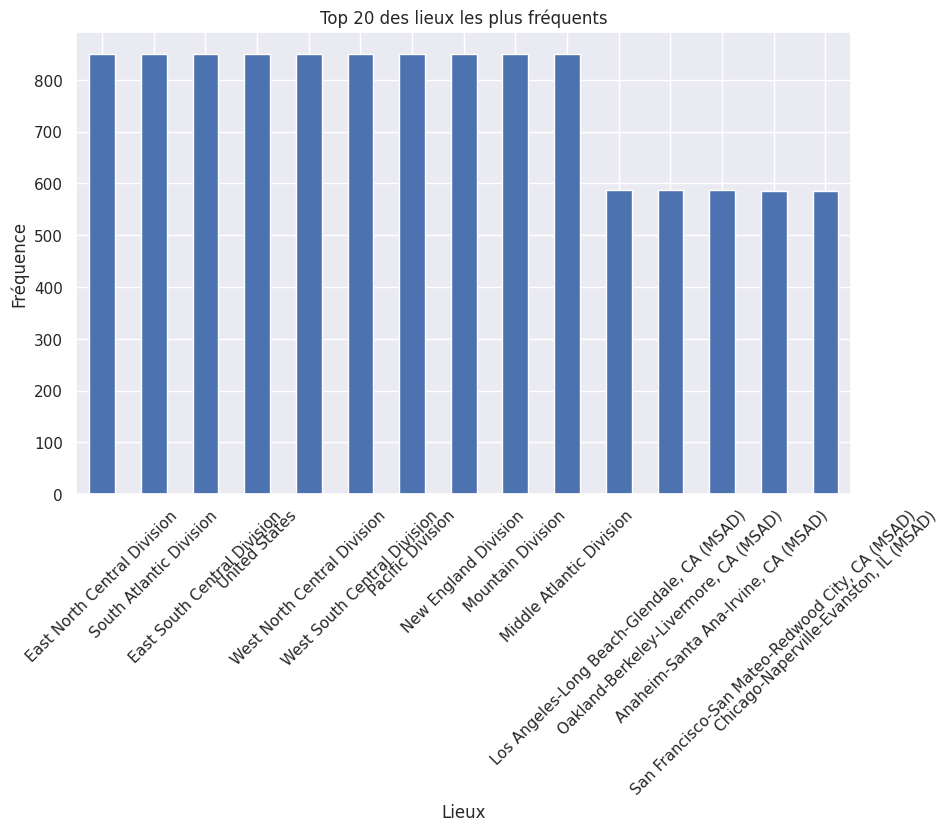

Les 15 lieux les plus fréquents :
 East North Central Division                        850
South Atlantic Division                            850
East South Central Division                        850
United States                                      850
West North Central Division                        850
West South Central Division                        850
Pacific Division                                   850
New England Division                               850
Mountain Division                                  850
Middle Atlantic Division                           850
Los Angeles-Long Beach-Glendale, CA (MSAD)         588
Oakland-Berkeley-Livermore, CA (MSAD)              587
Anaheim-Santa Ana-Irvine, CA (MSAD)                587
San Francisco-San Mateo-Redwood City, CA (MSAD)    586
Chicago-Naperville-Evanston, IL (MSAD)             586
Name: place_name, dtype: int64


In [107]:
plt.figure(figsize=(10, 6))
df['place_name'].value_counts().head(15).plot(kind='bar')
plt.title('Top 20 des lieux les plus fréquents')
plt.xlabel('Lieux')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

# Comptage des lieux les plus fréquents
top_places = df['place_name'].value_counts().head(15)
print("Les 15 lieux les plus fréquents :\n", top_places)

## L'étude de la variable 'years':

In [108]:
print(df['yr'].describe())

count    123970.000000
mean       2003.985634
std          11.761904
min        1975.000000
25%        1995.000000
50%        2005.000000
75%        2014.000000
max        2023.000000
Name: yr, dtype: float64


In [109]:
variance_yr = df['yr'].var()
print(variance_yr)

138.34238731843502


La colonne 'yr' présente une variabilité temporelle notable, couvrant une période allant de 1975 à 2023. Sa moyenne se situe autour de 2004, avec une dispersion d'environ ±11,76 ans autour de cette moyenne, illustrée par l'écart type. Les enregistrements montrent que la moitié des données se trouvent autour de l'année 2005 (médiane), avec 25% des données antérieures à 1995 et 75% antérieures à 2014 (quartiles). La variance de 138,34 indique la diversité des années par rapport à cette moyenne de 2004.

**Mesures de forme**

In [110]:
skewness_yr = df['yr'].skew()  # Asymétrie
kurtosis_yr = df['yr'].kurtosis()  # Aplatissement
print(f"Asymétrie: {skewness_yr}")
print(f"Aplatissement: {kurtosis_yr}")

Asymétrie: -0.2714510814807819
Aplatissement: -0.7968196927123388


La distribution des années présente une légère asymétrie négative (-0.27), indiquant une queue gauche un peu plus longue que la droite par rapport à la moyenne. De plus, l'aplatissement négatif (-0.79) suggère une distribution moins concentrée autour de la moyenne, avec des extrémités moins épaisses que celles d'une distribution normale.

**Représenter graphique**

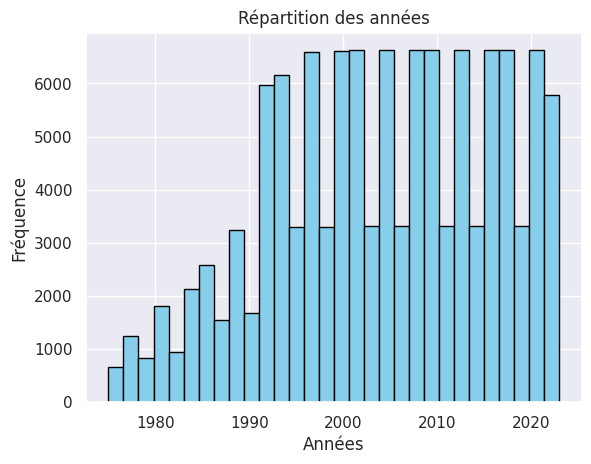

In [111]:
plt.hist(df['yr'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Années')
plt.ylabel('Fréquence')
plt.title('Répartition des années')
plt.show()

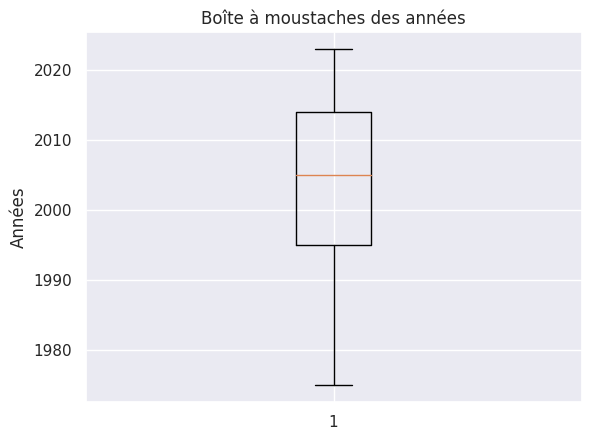

In [112]:
plt.boxplot(df['yr'])
plt.ylabel('Années')
plt.title('Boîte à moustaches des années')
plt.show()

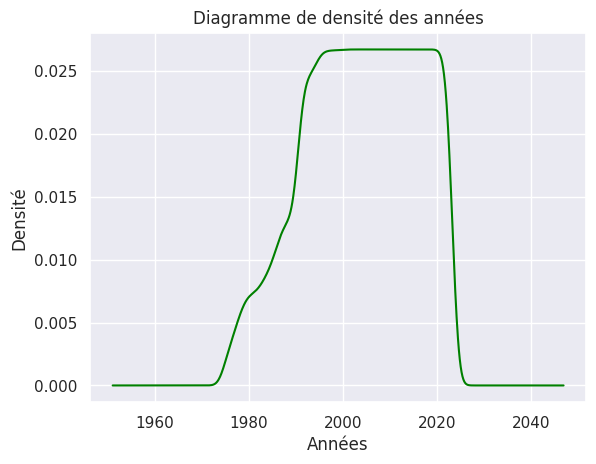

In [113]:
df['yr'].plot(kind='density', color='green')
plt.xlabel('Années')
plt.ylabel('Densité')
plt.title('Diagramme de densité des années')
plt.show()

## L'étude de la variable 'Index NSA (Not Seasonally Adjusted)':

In [114]:
print(df['index_nsa'].describe())

variance=df['index_nsa'].var()
print("Variance:",variance)
# Calcul de l'étendue
etendue = df['index_nsa'].max() - df['index_nsa'].min()
print("Étendue :", etendue)

count    123969.000000
mean        178.196744
std          97.409691
min          18.520000
25%         109.420000
50%         160.160000
75%         215.190000
max        1181.990000
Name: index_nsa, dtype: float64
Variance: 9488.647942328535
Étendue : 1163.47


**Moyenne (mean) :** La moyenne des prix des maisons est d'environ 178.20.

**Écart type (std) :** L'écart type de 97.41 montre la dispersion des valeurs autour de la moyenne.

**Minimum et Maximum (min et max) :** Les prix varient de 18.52 à 1181.99, illustrant l'amplitude des données.

**Quartiles (25%, 50%, 75%) :** Ces valeurs indiquent la distribution des prix des maisons. Par exemple, 25% des prix sont inférieurs à 109.42 et 75% sont inférieurs à 215.19.

**Variance :** La variance, mesurant la dispersion des valeurs par rapport à la moyenne, est de 9488.65.

**Étendue :** L'étendue des données (différence entre la valeur maximale et minimale) est de 1163.47.

**Mesures de forme :**

In [115]:
skewness_yr = df['index_nsa'].skew()  # Asymétrie
kurtosis_yr = df['index_nsa'].kurtosis()  # Aplatissement
print(f"Asymétrie: {skewness_yr}")
print(f"Aplatissement: {kurtosis_yr}")

Asymétrie: 2.0292903614350783
Aplatissement: 7.446864314027209


Les statistiques des indices des prix des maisons ('index_nsa') indiquent une distribution asymétrique positive avec une tendance vers les valeurs plus élevées.

 La dispersion des données est marquée, suggérant une concentration significative autour de la moyenne avec des valeurs extrêmes importantes, donnant ainsi une distribution plus pointue avec des queues plus lourdes que dans une distribution normale.

**Représenter graphique**

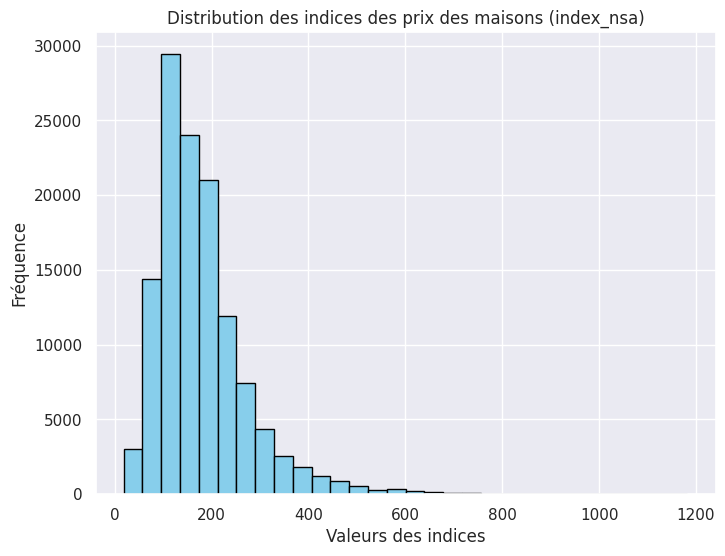

In [116]:
plt.figure(figsize=(8, 6))
plt.hist(df['index_nsa'], bins=30, color='skyblue', edgecolor='black')

# Ajout de titres et d'étiquettes
plt.title('Distribution des indices des prix des maisons (index_nsa)')
plt.xlabel('Valeurs des indices')
plt.ylabel('Fréquence')

# Affichage de l'histogramme
plt.show()

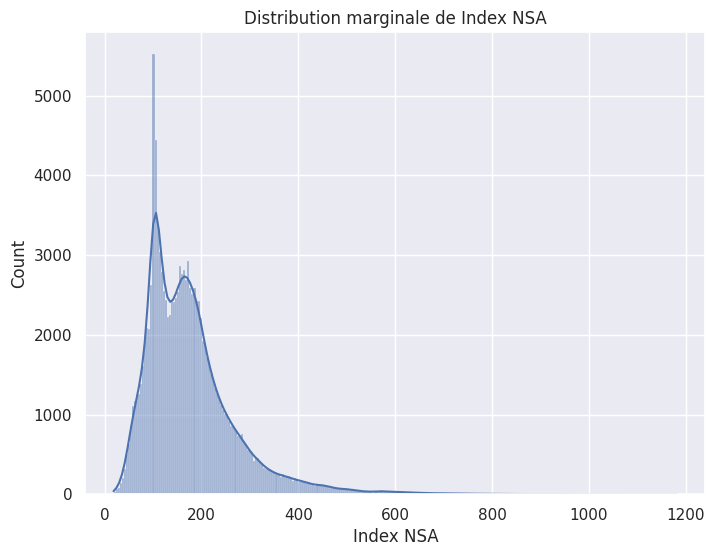

In [117]:
import seaborn as sns
# Distribution marginale de index_nsa
plt.figure(figsize=(8, 6))
sns.histplot(df['index_nsa'], kde=True)
plt.xlabel('Index NSA')
plt.title('Distribution marginale de Index NSA')
plt.show()

# L'étude de la variable 'Index SA (Seasonally Adjusted)':

In [118]:
print(df['index_sa'].describe())

variance=df['index_sa'].var()
print("Variance:",variance)
# Calcul de l'étendue
etendue = df['index_sa'].max() - df['index_sa'].min()
print("Étendue :", etendue)

count    41245.000000
mean       199.669754
std         92.208774
min         74.790000
25%        131.880000
50%        183.390000
75%        237.340000
max        828.160000
Name: index_sa, dtype: float64
Variance: 8502.457925630328
Étendue : 753.37


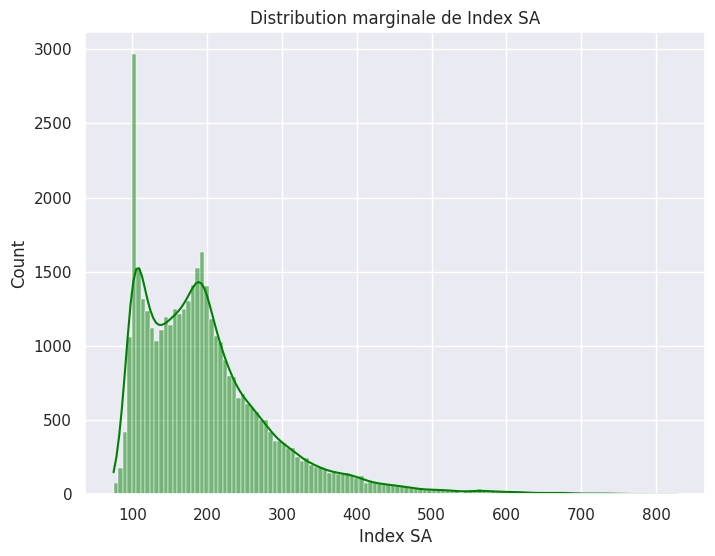

In [119]:

# Distribution marginale de index_sa
plt.figure(figsize=(8, 6))
sns.histplot(df['index_sa'], kde=True,color='green')
plt.xlabel('Index SA')
plt.title('Distribution marginale de Index SA')
plt.show()

resu

In [120]:
df.describe(include = 'all')

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
count,123970,123970,123970,123970,123970,123970,123970.000000,123970.000000,123969.000000,41245.000000
unique,4,3,2,4,466,466,NaN,NaN,NaN,NaN
top,traditional,all-transactions,quarterly,MSA,East North Central Division,DV_ENC,NaN,NaN,NaN,NaN
freq,116768,82725,120040,86533,850,850,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2003.985634,2.620416,178.196744,199.669754
std,NaN,NaN,NaN,NaN,NaN,NaN,11.761904,1.436340,97.409691,92.208774
min,NaN,NaN,NaN,NaN,NaN,NaN,1975.000000,1.000000,18.520000,74.790000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,2.000000,109.420000,131.880000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,3.000000,160.160000,183.390000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,4.000000,215.190000,237.340000


#2-Analyse bivariée:

In [121]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.91,100.97
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.31,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.70,100.99
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37


## Variables Quantitatives:

### analyse bivariée entre(index_nsa)'index_nsa'et'index_sa'

In [122]:
#contingency_table = pd.crosstab(df['index_nsa'], df['index_sa'])
#print(contingency_table)

Taille initiale : 123970, Taille après nettoyage : 41245
Slope: 0.9943883616432767, Intercept: 0.32130734156208973, R-value: 0.9997389451803874, P-value: 0.0, Std_err: 0.00011190430856637757


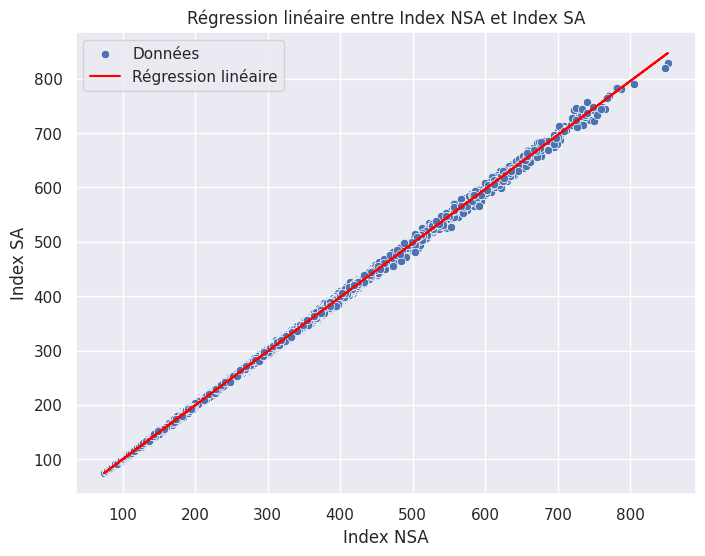

In [123]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'index_nsa' et 'index_sa'
df_cleaned = df.dropna(subset=['index_nsa', 'index_sa'])

# Vérifier la taille du DataFrame après avoir supprimé les lignes avec des valeurs manquantes
print(f"Taille initiale : {len(df)}, Taille après nettoyage : {len(df_cleaned)}")

# Effectuer la régression linéaire avec les données nettoyées
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['index_nsa'], df_cleaned['index_sa'])
print(f"Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Std_err: {std_err}")

# Nuage de points entre index_nsa et index_sa
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='index_nsa', y='index_sa', label='Données')
plt.xlabel('Index NSA')
plt.ylabel('Index SA')
plt.title('Nuage de points entre Index NSA et Index SA')


# Régression linéaire
plt.plot(df_cleaned['index_nsa'], slope * df_cleaned['index_nsa'] + intercept, color='red', label='Régression linéaire')
plt.legend()
plt.title('Régression linéaire entre Index NSA et Index SA')
plt.show()

Le coefficient de corrélation entre index_nsa et index_sa est très proche de 1 (0.999739), indiquant une forte corrélation positive presque parfaite entre ces deux variables. Cela signifie qu'il existe une relation linéaire presque parfaite entre ces deux indices.


(Nuage de points: dépendance totale
La connaissance de
la valeur prise par
l’une des variables
donne une indication
précise sur la valeur
de l’autre variable)

### analyse bivariée entre les années (yr) et  (index_nsa)

In [124]:
correlation = df[['yr', 'index_nsa']].corr()
print(correlation)


                yr  index_nsa
yr         1.00000    0.71542
index_nsa  0.71542    1.00000


corrélation de 0,715 montre une relation modérée mais positive entre les années et l'indice NSA, indiquant une tendance à l'augmentation de l'indice NSA avec le temps, bien que cela ne soit pas une dépendance linéaire forte. C'est une excellente synthèse des conclusions tirées de cette analyse bivariée.







Taille initiale : 123970, Taille après nettoyage : 123969
Slope: nan, Intercept: nan, R-value: nan, P-value: nan, Std_err: nan


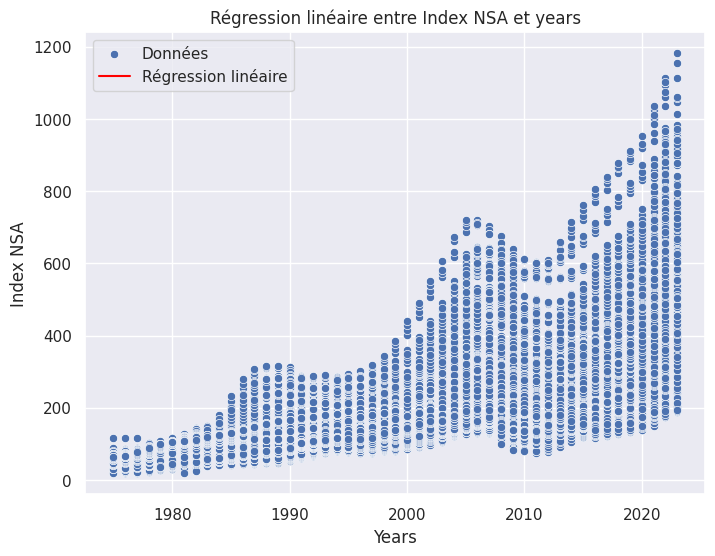

In [125]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'index_nsa' et 'index_sa'
df_cleaned = df.dropna(subset=['index_nsa', 'yr'])
# Vérifier la taille du DataFrame après avoir supprimé les lignes avec des valeurs manquantes
print(f"Taille initiale : {len(df)}, Taille après nettoyage : {len(df_cleaned)}")

# Effectuer la régression linéaire avec les données nettoyées
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['yr'], df_cleaned['index_sa'])
print(f"Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Std_err: {std_err}")

# Nuage de points entre index_nsa et index_sa
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='yr', y='index_nsa', label='Données')
plt.xlabel('Years')
plt.ylabel('Index NSA')
plt.title('Nuage de points entre Index NSA et years')


# Régression linéaire
plt.plot(df_cleaned['yr'], slope * df_cleaned['index_nsa'] + intercept, color='red', label='Régression linéaire')
plt.legend()
plt.title('Régression linéaire entre Index NSA et years')
plt.show()






## Variable Qualitative et Quantitative
### analyse bivariee entre "hpi_type"et "index_nsa":

### analyse bivariee entre "hpi_type"et "index_nsa":

Représentation graphique :

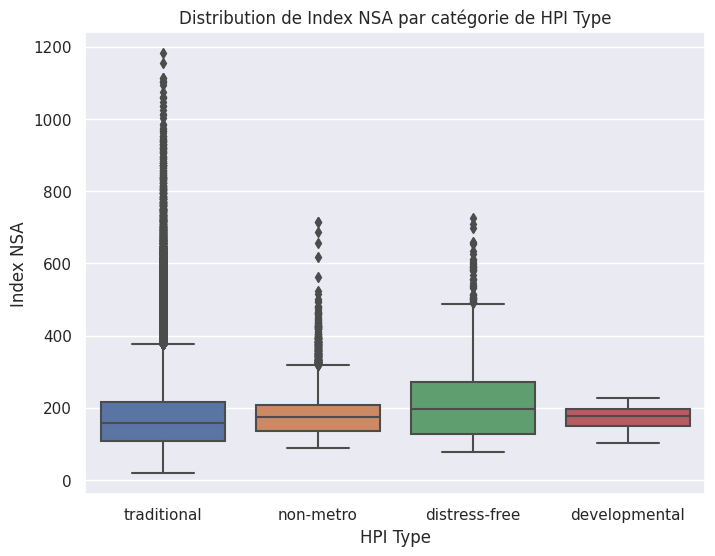

In [126]:
# Boxplot de index_nsa par catégorie de hpi_type
plt.figure(figsize=(8, 6))
sns.boxplot(x='hpi_type', y='index_nsa', data=df)
plt.xlabel('HPI Type')
plt.ylabel('Index NSA')
plt.title('Distribution de Index NSA par catégorie de HPI Type')
plt.show()

In [127]:
# Test de Student pour comparer les moyennes de index_nsa entre les différentes catégories de hpi_type
from scipy.stats import ttest_ind

categories = df['hpi_type'].unique()

for cat in categories:
    subset = df[df['hpi_type'] == cat]['index_nsa']
    print(f"Moyenne de Index NSA pour {cat}: {subset.mean()}")


Moyenne de Index NSA pour traditional: 177.41069145656343
Moyenne de Index NSA pour non-metro: 183.87769800148038
Moyenne de Index NSA pour distress-free: 217.89447837150126
Moyenne de Index NSA pour developmental: 172.33506666666662



Ces moyennes calculées pour chaque catégorie de 'hpi_type' représentent les valeurs moyennes de l'indice NSA ('index_nsa') pour chaque type. Elles offrent un aperçu des différences potentielles dans ces catégories.

La catégorie 'distress-free' présente la moyenne la plus élevée pour l'indice NSA, suggérant des valeurs plus élevées en moyenne par rapport aux autres catégories.
Les catégories 'traditional' et 'developmental' ont des moyennes relativement proches l'une de l'autre, bien que légèrement inférieures à celle de 'distress-free'.
La catégorie 'non-metro' présente une moyenne légèrement plus élevée que 'traditional' et 'developmental', mais plus basse que 'distress-free'.
Ces informations indiquent des variations dans les valeurs moyennes de l'indice NSA entre ces catégories. Cela pourrait suggérer des tendances ou des différences distinctes dans les indices NSA en fonction du type de données 'hpi_type'.


In [128]:
import itertools

# Liste des catégories uniques de hpi_type
categories = df['hpi_type'].unique()

# Comparaison des moyennes entre 'traditional' et chaque autre catégorie
category_1 = 'traditional'

for category_2 in categories:
    if category_2 != category_1:
        subset_1 = df[df['hpi_type'] == category_1]['index_nsa']
        subset_2 = df[df['hpi_type'] == category_2]['index_nsa']

        t_stat, p_val = ttest_ind(subset_1, subset_2, equal_var=False)
        print(f"Test de Student entre {category_1} et {category_2}: T-statistic = {t_stat}, P-value = {p_val}")


Test de Student entre traditional et non-metro: T-statistic = nan, P-value = nan
Test de Student entre traditional et distress-free: T-statistic = -14.30324890260876, P-value = 9.096013112069476e-44
Test de Student entre traditional et developmental: T-statistic = 2.6111574402902056, P-value = 0.009606393005279453



Les comparaisons des moyennes de l'indice NSA entre les catégories 'traditional' et 'distress-free', ainsi que 'traditional' et 'developmental', ont révélé des différences significatives.

Le test de Student a montré des valeurs de T-statistic respectivement de -14.30 et de 2.61, avec des P-values très faibles, indiquant des divergences marquées dans les moyennes de l'indice NSA entre ces catégories. Ces résultats suggèrent des variations notables dans les données en fonction de ces classifications, soulignant des différences significatives dans les tendances de l'indice NSA entre les catégories 'traditional' et 'distress-free', ainsi que 'traditional' et 'developmental'.

### analyse bivariee entre "level"et "index_nsa":

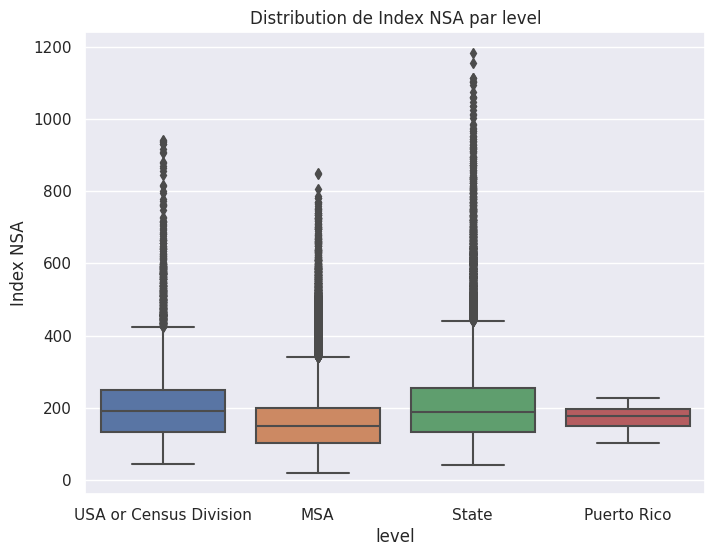

In [129]:
# Boxplot de index_nsa par catégorie de hpi_type
plt.figure(figsize=(8, 6))
sns.boxplot(x='level', y='index_nsa', data=df)
plt.xlabel('level')
plt.ylabel('Index NSA')
plt.title('Distribution de Index NSA par level')
plt.show()

In [130]:
# Test de Student pour comparer les moyennes de index_nsa entre les différentes catégories de hpi_type
from scipy.stats import ttest_ind

categories = df['level'].unique()

for cat in categories:
    subset = df[df['level'] == cat]['index_nsa']
    print(f"Moyenne de Index NSA pour {cat}: {subset.mean()}")


Moyenne de Index NSA pour USA or Census Division: 212.40386470588237
Moyenne de Index NSA pour MSA: 162.17121040527888
Moyenne de Index NSA pour State: 216.4154024589878
Moyenne de Index NSA pour Puerto Rico: 172.33506666666662


In [131]:
import itertools

# Liste des catégories uniques de hpi_type
categories = df['level'].unique()

# Comparaison des moyennes entre 'traditional' et chaque autre catégorie
category_1 = 'USA or Census Division'

for category_2 in categories:
    if category_2 != category_1:
        subset_1 = df[df['level'] == category_1]['index_nsa']
        subset_2 = df[df['level'] == category_2]['index_nsa']

        t_stat, p_val = ttest_ind(subset_1, subset_2, equal_var=False)
        print(f"Test de Student entre {category_1} et {category_2}: T-statistic = {t_stat}, P-value = {p_val}")

Test de Student entre USA or Census Division et MSA: T-statistic = 41.37605190565189, P-value = 0.0
Test de Student entre USA or Census Division et State: T-statistic = nan, P-value = nan
Test de Student entre USA or Census Division et Puerto Rico: T-statistic = 17.756758842046285, P-value = 3.9099992877045233e-53


## Variable Qualitative

### analyse entre'hpi_type' et 'hpi_flavor'

In [132]:
#Tableau de Contingence
contingency_table = pd.crosstab(df['hpi_type'], df['hpi_flavor'])
contingency_table


hpi_flavor,all-transactions,expanded-data,purchase-only
hpi_type,,,
developmental,114,0,111
distress-free,0,0,1572
non-metro,5405,0,0
traditional,77206,14541,25021


Le tableau de contingence présente une distribution croisée des types de hpi_type et de hpi_flavor. On observe des tendances distinctes dans les occurrences pour chaque type de hpi_type en fonction des différentes saveurs de hpi_flavor.

Developmental: Prédominance de purchase-only et all-transactions, avec une absence de données pour expanded-data.

Distress-free: Aucune donnée pour all-transactions ou expanded-data.

Non-metro: Uniquement des données pour all-transactions.

Traditional: Répartition plus équilibrée entre les saveurs de hpi_flavor.

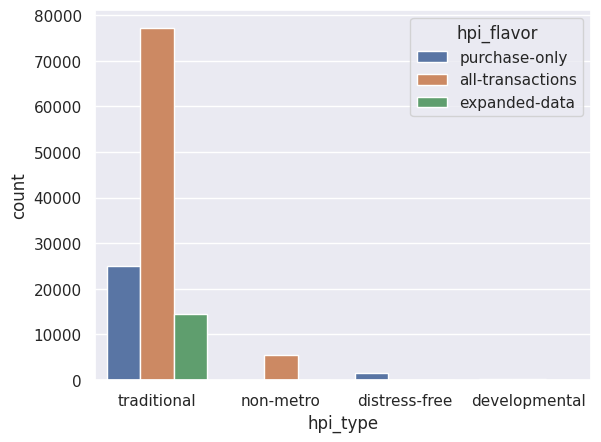

In [133]:
#Diagramme en Barres :
sns.countplot(x='hpi_type', hue='hpi_flavor', data=df)
plt.show()


In [134]:
#Test de Chi2 (Khi-deux)
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 8595.729984916265
P-value: 0.0


La forte statistique de Chi2 (8595.73) et le p-value très bas (0.0) indiquent une association significative entre les variables hpi_type et hpi_flavor. Cette relation démontre que ces deux variables ne sont pas indépendantes mais présentent une corrélation significative.

# Multivariable analysis

Calculer les moyennes des variables

Calculer la matrice de covariance/corrélation

In [135]:
# Calcul de la matrice de corrélation
correlation_matrix = df[['yr', 'period', 'index_nsa', 'index_sa']].corr()

# OU Calcul de la matrice de covariance
covariance_matrix = df[['yr', 'period', 'index_nsa', 'index_sa']].cov()



In [136]:
correlation_matrix

,yr,period,index_nsa,index_sa
yr,1.000000,0.004099,0.715420,0.768658
period,0.004099,1.000000,0.020052,-0.001028
index_nsa,0.715420,0.020052,1.000000,0.999739
index_sa,0.768658,-0.001028,0.999739,1.000000


In [137]:
covariance_matrix

,yr,period,index_nsa,index_sa
yr,138.342387,0.069243,819.669029,669.931448
period,0.069243,2.063072,2.805549,-0.180174
index_nsa,819.669029,2.805549,9488.647942,8545.976218
index_sa,669.931448,-0.180174,8545.976218,8502.457926


In [138]:
# Calcul des moyennes des variables
means = df[['yr', 'period', 'index_nsa', 'index_sa']].mean()
means


yr           2003.985634
period          2.620416
index_nsa     178.196744
index_sa      199.669754
dtype: float64

Calculer les valeurs propres et les vecteurs propres

<ipython-input-139-70611bd76f4b>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.fillna(df_cleaned.median(), inplace=True)  # Remplacez par la médiane ici
<ipython-input-139-70611bd76f4b>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


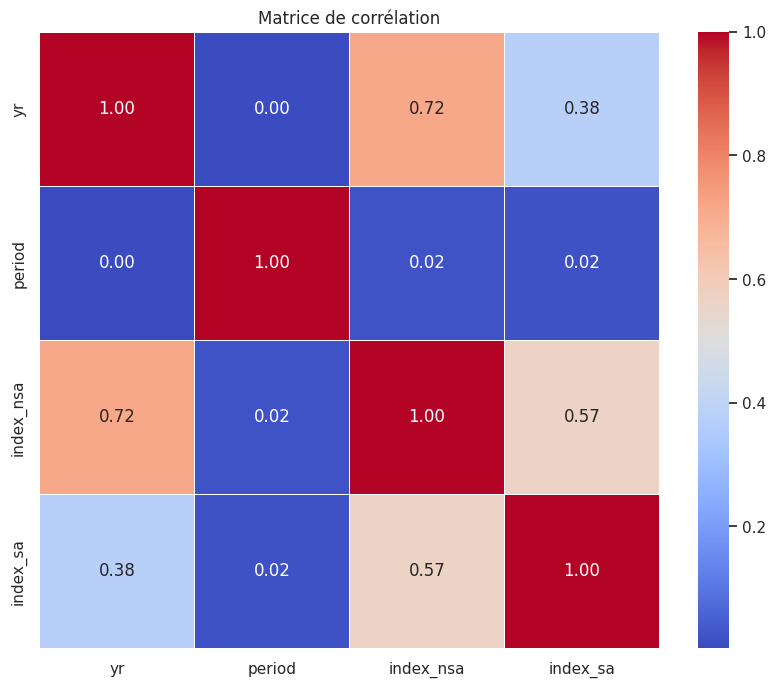

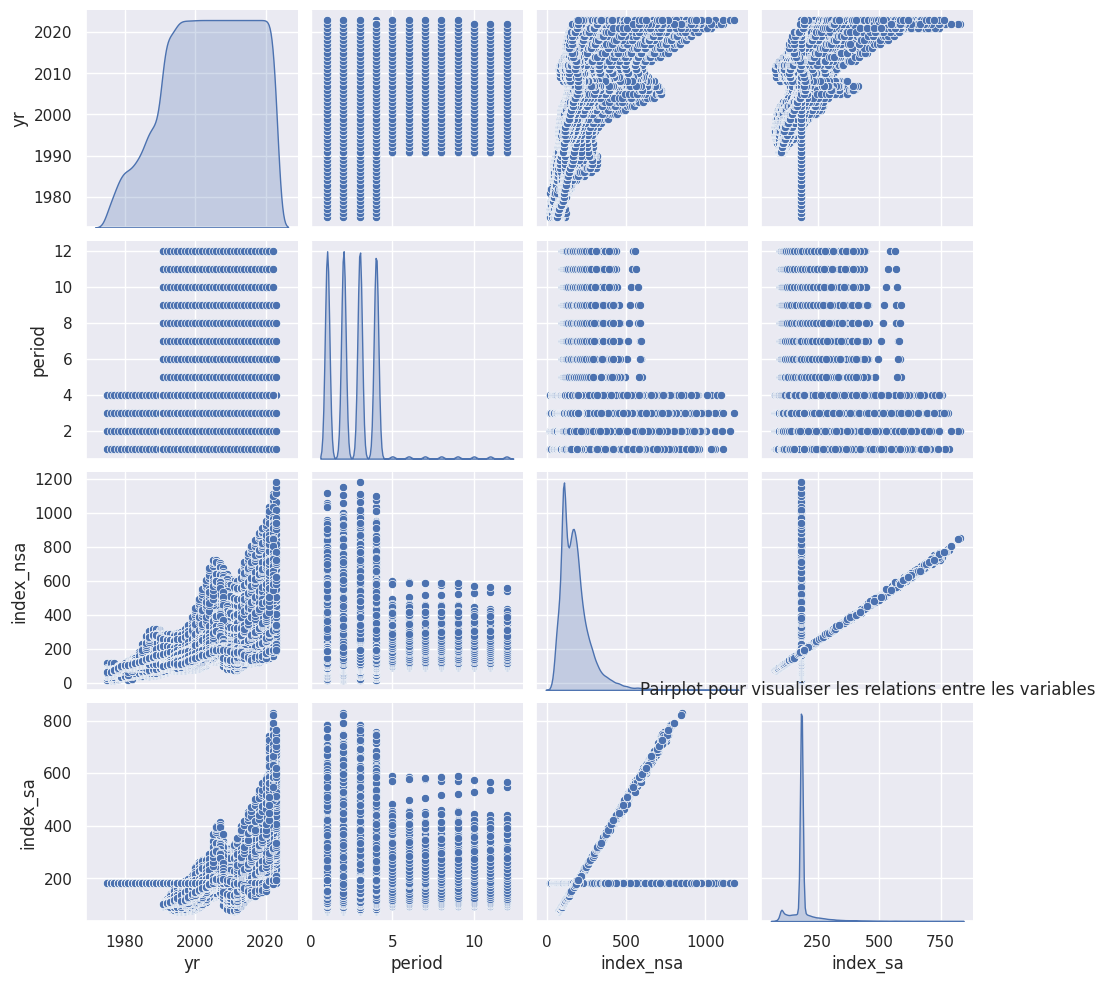

In [139]:
# Supprimez les colonnes inutiles pour la visualisation (si nécessaire)
columns_to_drop = [ 'place_id']  # Ajoutez d'autres colonnes si nécessaire
df_cleaned = df.drop(columns=columns_to_drop)

# Remplacez les valeurs manquantes (NaN) par la médiane ou toute autre méthode de votre choix
df_cleaned.fillna(df_cleaned.median(), inplace=True)  # Remplacez par la médiane ici

# Visualisation : Matrice de corrélation avec seaborn
corr = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

# Pairplot pour visualiser les relations entre les variables
sns.pairplot(df_cleaned, diag_kind='kde')
plt.title('Pairplot pour visualiser les relations entre les variables')
plt.show()


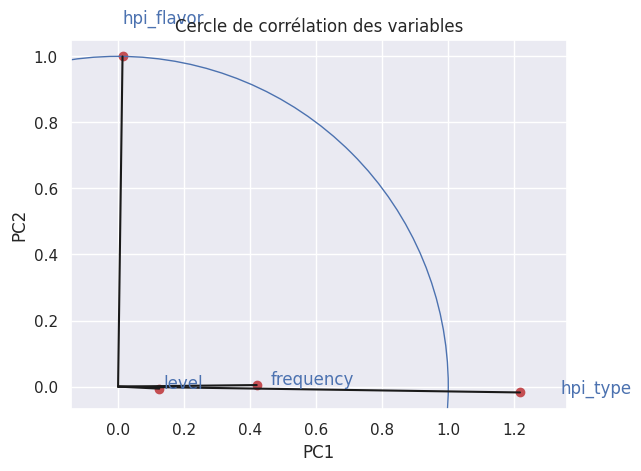

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Sélection des colonnes à utiliser dans l'ACP
data_for_pca = df[['yr', 'period', 'index_nsa', 'index_sa']]

# Création d'une instance de SimpleImputer pour remplacer les NaN par la moyenne
imputer = SimpleImputer(strategy='mean')

# Remplacement des NaN par la moyenne des colonnes
data_without_nan = imputer.fit_transform(data_for_pca)

# Création d'une instance de StandardScaler
scaler = StandardScaler()

# Centrage et réduction des données
scaled_data = scaler.fit_transform(data_without_nan)

# Création d'une instance PCA
pca = PCA(n_components=4)

# Ajustement du modèle PCA aux données centrées et réduites
pca.fit(scaled_data)

# Projection des données sur les composantes principales
projected_data = pca.transform(scaled_data)


import matplotlib.pyplot as plt
import numpy as np

# Supposons que 'pca' est votre modèle PCA déjà ajusté

# Récupération des composantes principales
components = pca.components_

# Calcul des valeurs propres
eigenvalues = pca.explained_variance_

# Création de la figure
fig, ax = plt.subplots()

# Dessiner le cercle de corrélation
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    # Dessiner une ligne entre l'origine et le point (x, y)
    plt.plot([0, x*eigenvalues[i]], [0, y*eigenvalues[i]], color='k')
    # Dessiner les variables en tant que points sur le cercle
    plt.scatter(x*eigenvalues[i], y*eigenvalues[i], color='r')
    # Ajouter le nom de la variable
    plt.text(x*eigenvalues[i]*1.1, y*eigenvalues[i]*1.1, df.columns[i], color='b')

# Dessiner un cercle unitaire
circle = plt.Circle((0,0), 1, color='b', fill=False)
ax.add_artist(circle)

# Configurations supplémentaires
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation des variables')
plt.axis('equal')
plt.show()




In [141]:

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Sélection des colonnes pour l'analyse PCA
data_for_pca = df[['yr', 'period', 'index_nsa', 'index_sa']]

# Remplacer les valeurs NaN par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
data_for_pca_filled = imputer.fit_transform(data_for_pca)

# Appliquer PCA sur les données nettoyées
pca = PCA(n_components=4)
pca.fit(data_for_pca_filled)
projected_data = pca.transform(data_for_pca_filled)

# Créer un DataFrame pour visualiser les composantes principales
columns = ['PC1', 'PC2', 'PC3', 'PC4']
correlation_with_axes = pca.components_.T * np.sqrt(pca.explained_variance_)
correlation_df = pd.DataFrame(correlation_with_axes, columns=columns, index=data_for_pca.columns)

# Afficher la corrélation entre les variables initiales et les axes
print(correlation_df)



                 PC1        PC2       PC3       PC4
yr          8.298350  -1.821066 -8.134094  0.004042
period      0.025341  -0.024140  0.023458  1.435722
index_nsa  96.331058 -14.434417  0.739161 -0.000984
index_sa   35.456043  39.643316 -0.104502  0.000702


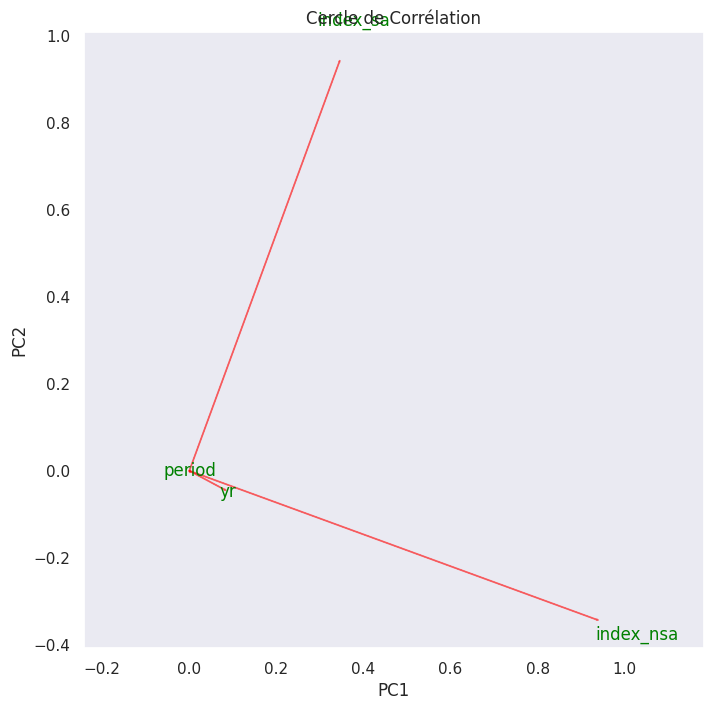

In [142]:
import matplotlib.pyplot as plt

# Affichage du cercle de corrélation
plt.figure(figsize=(8, 8))
plt.Circle((0, 0), 1, color='blue', fill=False)
plt.axis('equal')

for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, data_for_pca.columns[i], color='green', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.show()


In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns

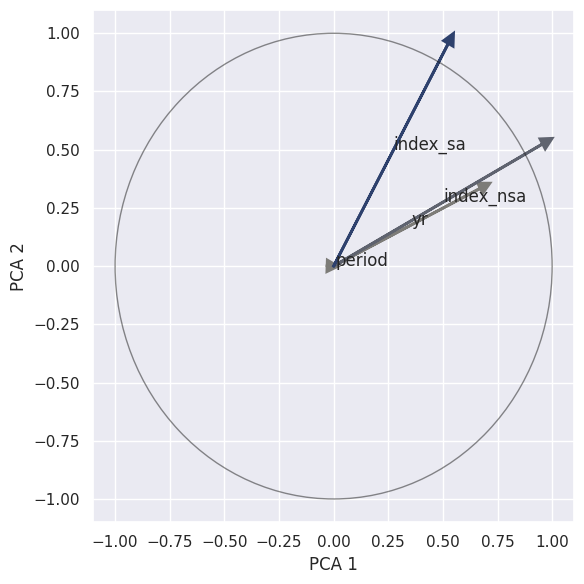

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Sélection des colonnes pour l'analyse PCA
columns_for_pca = ['yr', 'period', 'index_nsa', 'index_sa']
data_for_pca = df[columns_for_pca]

# Remplacement des valeurs manquantes par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
data_for_pca_filled = imputer.fit_transform(data_for_pca)

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca_filled)

# Appliquer PCA sur les données traitées
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Calcul des corrélations entre les variables originales et les composantes principales
correlations_with_pca = np.corrcoef(scaled_data.T, pca_data.T)

# Création de la figure et du cercle de corrélation
fig, axs = plt.subplots(figsize=(6, 6))
for i, col in enumerate(columns_for_pca):
    arrow_col = plt.cm.cividis((correlations_with_pca[i, 0] + correlations_with_pca[i, 1]) / 2)  # Utilisation de la moyenne pour obtenir une seule valeur
    axs.arrow(0, 0,
              correlations_with_pca[i, 2],  # 2 pour PC1
              correlations_with_pca[i, 3],  # 3 pour PC2
              lw=2,  # épaisseur de ligne
              length_includes_head=True,
              color=arrow_col,
              fc=arrow_col,
              head_width=0.05,
              head_length=0.05)
    axs.text(correlations_with_pca[i, 2]/2, correlations_with_pca[i, 3]/2, col)

# Dessiner le cercle unitaire, pour plus de clarté
circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
axs.add_patch(circle)
axs.set_xlabel("PCA 1")
axs.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()



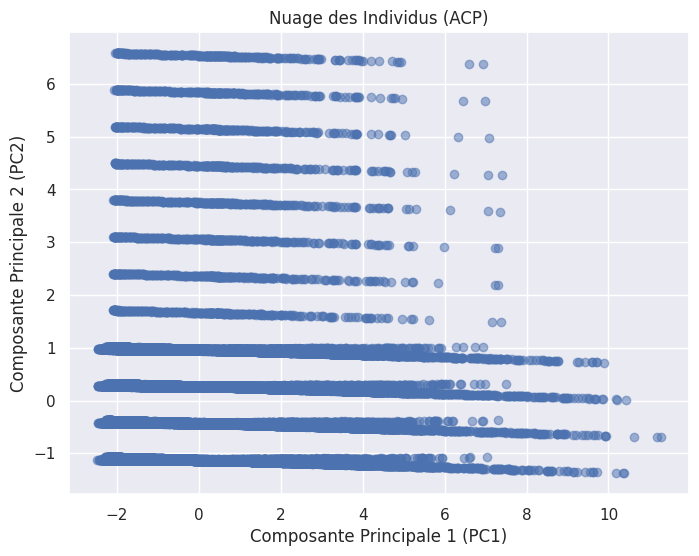

Résultats de l'ACP :
Valeurs propres :  [2.09373436 1.00013244]
Pourcentage de variance expliqué :  [0.52342937 0.25003109]
Contributions des variables :  [[ 0.58122738  0.01346317  0.63541982  0.50816841]
 [-0.00850025  0.99961607  0.00694201 -0.0254414 ]]


In [145]:
# Charger vos données dans un DataFrame 'df' (assurez-vous de charger correctement vos données)

# Sélectionner les colonnes pour l'analyse PCA
columns_for_pca = ['yr', 'period', 'index_nsa', 'index_sa']
data_for_pca = df[columns_for_pca]

# Remplacer les valeurs manquantes par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
data_for_pca_filled = imputer.fit_transform(data_for_pca)

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca_filled)

# Appliquer PCA avec 2 composantes principales
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Visualiser les coordonnées des individus dans le plan factoriel
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.title('Nuage des Individus (ACP)')
plt.grid(True)
plt.show()

# Obtenir les résultats de l'ACP
print("Résultats de l'ACP :")
print("Valeurs propres : ", pca.explained_variance_)
print("Pourcentage de variance expliqué : ", pca.explained_variance_ratio_)
print("Contributions des variables : ", pca.components_)
# ... (d'autres analyses ou visualisations peuvent être réalisées ici)



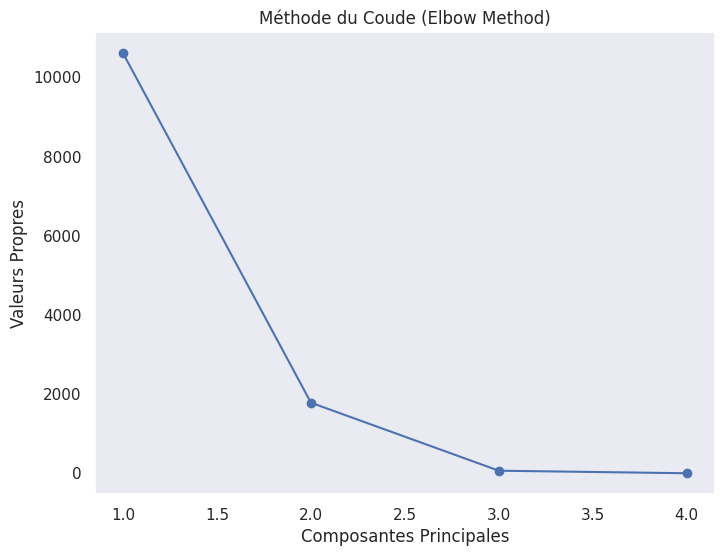

In [146]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sélection des colonnes pour l'analyse PCA
data_for_pca = df[['yr', 'period', 'index_nsa', 'index_sa']]

# Remplacer les valeurs NaN par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
data_for_pca_filled = imputer.fit_transform(data_for_pca)

# Appliquer PCA sur les données nettoyées
pca = PCA()
pca.fit(data_for_pca_filled)

# Obtenir les valeurs propres
eigenvalues = pca.explained_variance_

# Tracer le graphique du coude (Elbow)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel('Composantes Principales')
plt.ylabel('Valeurs Propres')
plt.title('Méthode du Coude (Elbow Method)')
plt.grid()
plt.show()




In [147]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Sélection des colonnes pour l'analyse PCA
data_for_pca = df[['yr', 'period', 'index_nsa', 'index_sa']]

# Remplacer les valeurs NaN par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
data_for_pca_filled = imputer.fit_transform(data_for_pca)

# Appliquer PCA sur les données nettoyées
pca = PCA()
pca.fit(data_for_pca_filled)

# Obtenir les valeurs propres
eigenvalues = pca.explained_variance_

# Règle de Kaiser pour déterminer le nombre de composantes principales à conserver
threshold = 1
num_components_kaiser = sum(eigenvalues > threshold)
print(f"Nombre de composantes principales selon la règle de Kaiser : {num_components_kaiser}")

# Sélectionner les composantes principales à conserver
pca = PCA(n_components=num_components_kaiser)
projected_data = pca.fit_transform(data_for_pca_filled)

# Scores des composantes principales pour chaque observation
component_scores = pd.DataFrame(projected_data, columns=[f"PC{i}" for i in range(1, num_components_kaiser + 1)])
print(component_scores.head())  # Affichage des scores de composantes principales


Nombre de composantes principales selon la règle de Kaiser : 4
          PC1        PC2       PC3       PC4
0 -108.507052 -66.277895  7.125588 -1.652075
1 -107.321633 -65.678905  7.198397 -0.652229
2 -106.960999 -65.853754  7.237977  0.347473
3 -106.575289 -65.931307  7.275373  1.347231
4 -105.854912 -65.790487  7.330393  2.346980


In [148]:
# Calcul de la contribution (CTR) de chaque individu à chaque axe principal
ctr_values = pd.DataFrame((pca.transform(data_for_pca_filled) ** 2) / pca.explained_variance_, columns=[f"CTR_PC{i}" for i in range(1, num_components_kaiser + 1)])
print(ctr_values.head())  # Affichage des valeurs de CTR pour les individus



    CTR_PC1   CTR_PC2   CTR_PC3   CTR_PC4
0  1.110141  2.463328  0.760986  1.324083
1  1.086017  2.419005  0.776617  0.206374
2  1.078730  2.431902  0.785181  0.058573
3  1.070964  2.437633  0.793315  0.880521
4  1.056535  2.427231  0.805360  2.672235


In [149]:
# Calcul de la corrélation entre les variables initiales et les axes principaux
correlation_with_axes = pca.components_.T * np.sqrt(pca.explained_variance_)
correlation_df = pd.DataFrame(correlation_with_axes, columns=[f"Corr_PC{i}" for i in range(1, num_components_kaiser + 1)], index=data_for_pca.columns)
print(correlation_df)  # Affichage des corrélations entre les variables et les axes


            Corr_PC1   Corr_PC2  Corr_PC3  Corr_PC4
yr          8.298350  -1.821066 -8.134094  0.004042
period      0.025341  -0.024140  0.023458  1.435722
index_nsa  96.331058 -14.434417  0.739161 -0.000984
index_sa   35.456043  39.643316 -0.104502  0.000702
